In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# create db
def create_db_connection():
    mydb = mysql.connector.connect(
        host="node157.tezzt.nl",
        user="theotheu",
        password='aQ743Gp-',
        database='new_approaches'
    )
    return mydb

In [82]:
def get_data_from_database(mydb):
    mycursor = mydb.cursor(buffered=True)
    query = "select repo.name, t.pattern, t.stemmed, t.lemmatized, r.patterns_found, r.stemmed_found, r.lemmatized_found from search_results r, search_terms t, repos repo where t.id=r.search_terms_id and repo.id=r.repos_id limit 10"
    query = "select repo.name, t.pattern, t.stemmed, t.lemmatized, concat(t.pattern, ' - ', t.stemmed, ' - ', t.lemmatized) label, r.patterns_found, r.stemmed_found, r.lemmatized_found  from search_results r, search_terms t, repos repo  where repo.id=%s and t.id not in (2, 22, 23, 61, 57) and t.id=r.search_terms_id and repo.id=r.repos_id  order by lower(repo.name), t.pattern"
    data = (14,)
    mycursor.execute(query, data)
    myresult = mycursor.fetchall()
    mycursor.close()
    return myresult

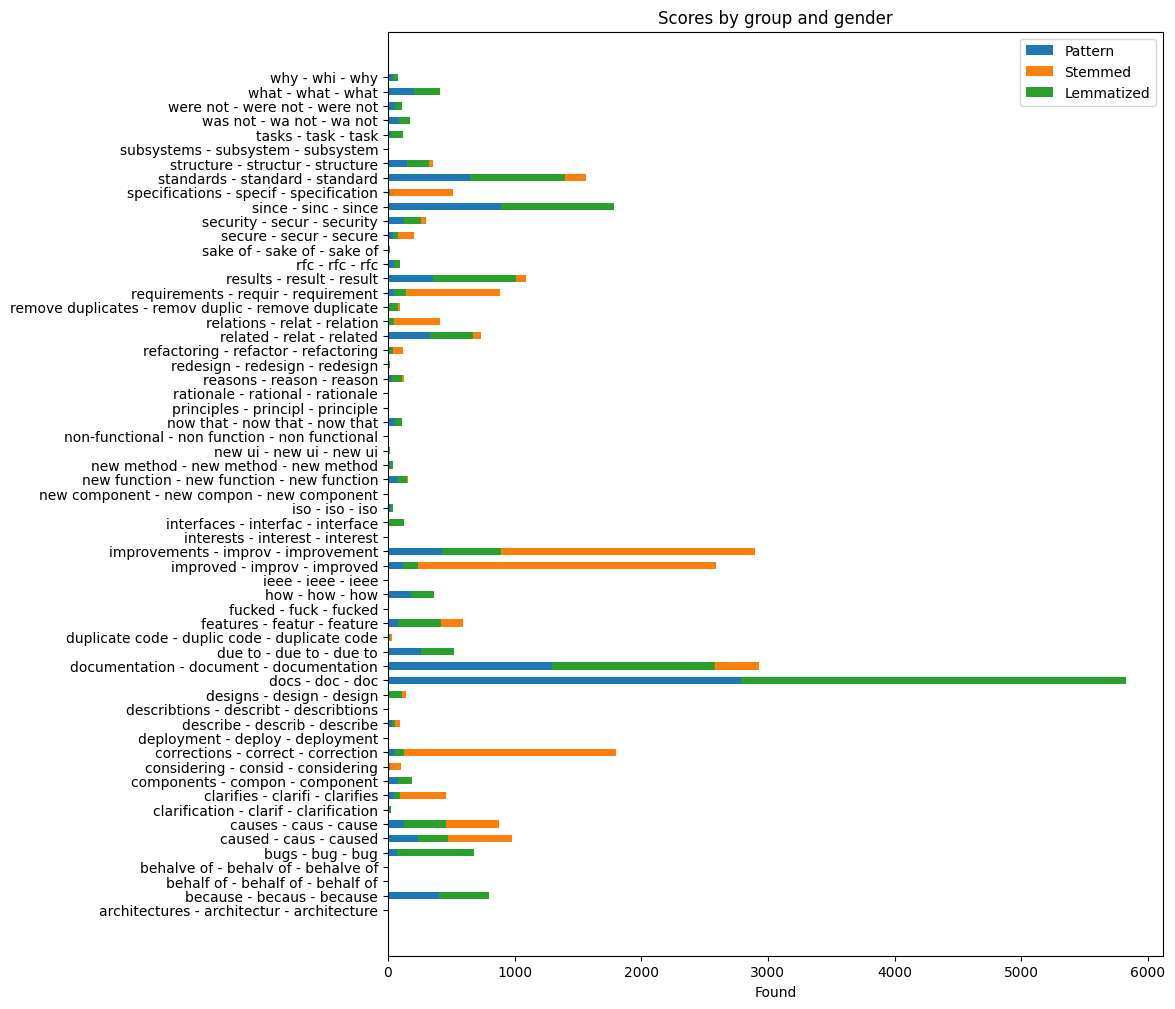

In [87]:
def prepare_data(data):
    labels = []
    patterns_found = []
    stemmed_found = []
    lemmatized_found = []
    for row in data:
        repo_name = bytes(row[0]).decode('utf-8')
        label = bytes(row[4]).decode('utf-8')
        _patterns_found = int(row[5])
        _stemmed_found = int(row[6])
        _lemmatized_found =int(row[7])
        labels.append(label)
        patterns_found.append(_patterns_found)
        stemmed_found.append(_stemmed_found)
        lemmatized_found.append(_lemmatized_found)

    width = 0.5# the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=(10,12))

    ax.barh(labels, patterns_found, width, label='Pattern')
    ax.barh(labels, stemmed_found, width, left=patterns_found,label='Stemmed')
    ax.barh(labels, lemmatized_found, width, left=patterns_found,label='Lemmatized')


    ax.set_xlabel('Found')
    ax.set_title('Scores by group and gender')
    ax.legend()

    plt.show()
        
    
mydb = create_db_connection()
data = get_data_from_database(mydb)
prepare_data(data)
    

In [76]:
def nested_set(dic, keys, value):
    for key in keys[:-1]:
        dic = dic.setdefault(key, {})
    dic[keys[-1]] = value

def nested_get(dic, keys):    
    for key in keys:
        dic = dic[key]
    return dic    

In [97]:

d = nested_set = (d, {'a':1, 'b':2, 'c':3}, {1,3,4})
print (d)
print (d[1]['c'])


(({}, {'a': 1, 'b': 2, 'c': 3}, {1, 3, 4}), {'a': 1, 'b': 2, 'c': 3}, {1, 3, 4})
3


In [99]:
k = {'a': 1, 'b': 2, 'c': 3}
print (d[k])

TypeError: tuple indices must be integers or slices, not dict

[10.00367304, 10.42750809, 10.09280011, 8.66745522, 12.77785333, 10.06334846]


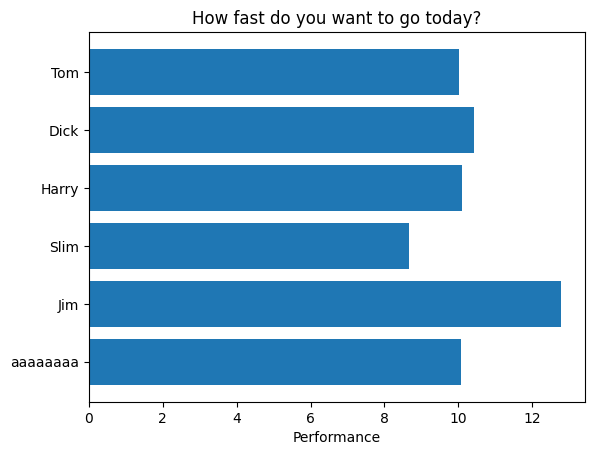

In [13]:


# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim','aaaaaaaa')
y_pos = np.arange(len(people))
performance = [10.00367304, 10.42750809, 10.09280011,  8.66745522, 12.77785333, 10.06334846]
print (performance)
error = np.random.rand(len(people))

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

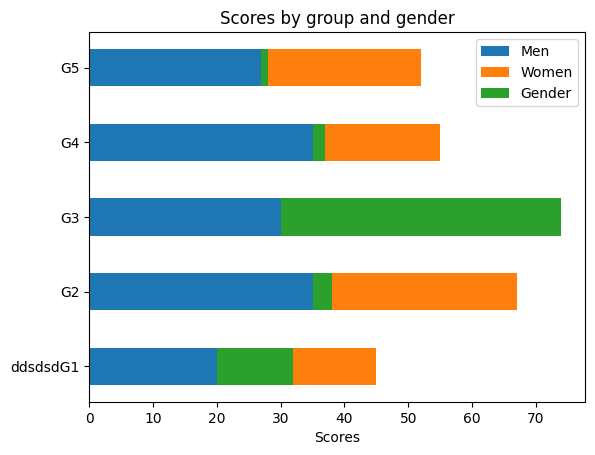

In [22]:
labels = ['ddsdsdG1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
gender_means = [12, 3, 44, 2, 1]
width = 0.5# the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, men_means, width,  label='Men')
ax.barh(labels, women_means, width,  left=men_means,label='Women')
ax.barh(labels, gender_means, width,  left=men_means,label='Gender')


ax.set_xlabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()